In [4]:
import platform
print(platform.system())
print(platform.release())
print(platform.platform())
print(platform.version())


Windows
10
Windows-10-10.0.22631-SP0
10.0.22631


In [5]:

import torch
import numpy as np
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Extract features and target
data = df.drop('class', axis=1).values.astype(np.float32)
labels = df['class'].astype('category').cat.codes
# print(labels)
# Create tensor dataset
iris = TensorDataset(torch.FloatTensor(data),torch.LongTensor(labels))

# Create random batches
iris_loader = DataLoader(iris, batch_size=4, shuffle=True)

next(iter(iris_loader))

[tensor([[4.9000, 2.5000, 4.5000, 1.7000],
         [5.2000, 4.1000, 1.5000, 0.1000],
         [5.6000, 2.8000, 4.9000, 2.0000],
         [7.4000, 2.8000, 6.1000, 1.9000]]),
 tensor([2, 0, 2, 2])]

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

1. Dataset stores the samples and their corresponding labels
2. DataLoader wraps an iterable around the Dataset to enable easy access to the samples. **bold text**

Dataset lists
1. https://pytorch.org/vision/stable/datasets.html
2. https://pytorch.org/text/stable/datasets.html
3. https://pytorch.org/audio/stable/datasets.html



We load the FashionMNIST Dataset with the following parameters:
1. root is the path where the train/test data is stored,

2. train specifies training or test dataset,

3. download=True downloads the data from the internet if it’s not available at root.

4. transform and target_transform specify the feature and label transformations


In [8]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [9]:
training_data = datasets.FashionMNIST(
                                          root="data",
                                          train=True,
                                          download=True,
                                          transform=ToTensor()
                                              )

test_data = datasets.FashionMNIST(
                                        root="data",
                                        train=False,
                                        download=True,
                                        transform=ToTensor()
                                    )

In [10]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [11]:
len(test_data)

10000

In [12]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [13]:
training_data[1]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
           0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
           0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
           1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
           0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
           0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
           0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
           0.7765, 0.7843, 0.7843, 0.7843, 

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows +1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

1. samples in “minibatches”,
2. reshuffle the data at every epoch to reduce model overfitting,
3. and use Python’s multiprocessing to speed up data retrieval.

**DataLoader is an iterable that abstracts this complexity for us in an easy API.**

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


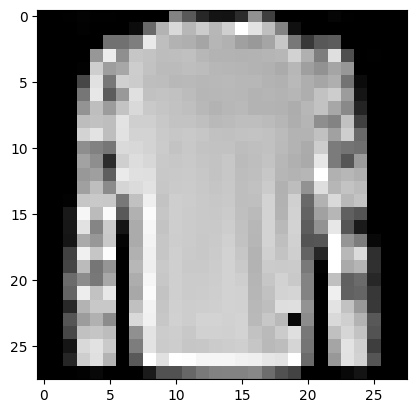

Label: 2


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")


img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")